# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn import metrics


diabetes = load_diabetes()

In [4]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [5]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [6]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

In [7]:
# 1. There are ten numeric columns 
#     - age     age in years
#     - sex
#     - bmi     body mass index
#     - bp      average blood pressure
#     - s1      tc, total serum cholesterol
#     - s2      ldl, low-density lipoproteins
#     - s3      hdl, high-density lipoproteins
#     - s4      tch, total cholesterol / HDL
#     - s5      ltg, possibly log of serum triglycerides level
#     - s6      glu, blood sugar level

# 2.Each of these 10 feature variables have been mean centered and scaled by the standard deviation times
#  the square root of `n_samples` (i.e. the sum of squares of each column totals 1).
# 3. 442 muestras

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [8]:
diabetes['data'].shape

(442, 10)

In [9]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [10]:
data = pd.DataFrame(diabetes['data'],columns=diabetes['feature_names'])
data.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [11]:
target = pd.DataFrame(diabetes['target'])
target

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


## Building a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [12]:
from sklearn.linear_model import LinearRegression


#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [13]:
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [14]:
X = data[['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6']]
y = target[0]

In [22]:
X.shape

(442, 9)

In [23]:
y.shape

(442,)

In [24]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)  

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 9)
(89, 9)
(353,)
(89,)


Perform a brief exploratory analysis to investigate the conditions necessary for linear regression. This analysis will help you understand the distribution of the target variable and its correlations with other features.

In [16]:
data['target']= target[0]

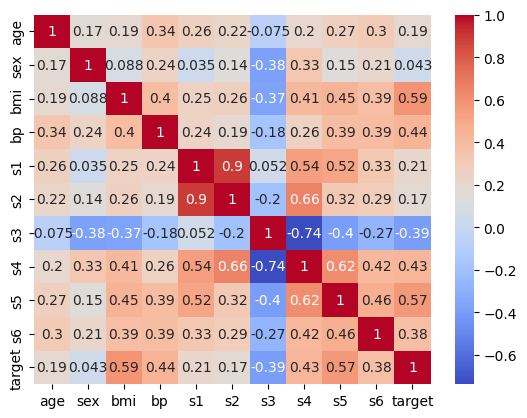

In [17]:
sns.heatmap(data.corr(numeric_only=True), annot=True,cmap='coolwarm');

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [18]:
from sklearn.linear_model import LinearRegression

model_linreg = LinearRegression()

In [27]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler()
std_scale.fit(X_train)
X_train_scal = std_scale.transform(X_train)
X_test_scal = std_scale.transform(X_test)

In [28]:
model_linreg.fit(X_train_scal,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
predicciones = model_linreg.predict(X_test)

c:\Users\Andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


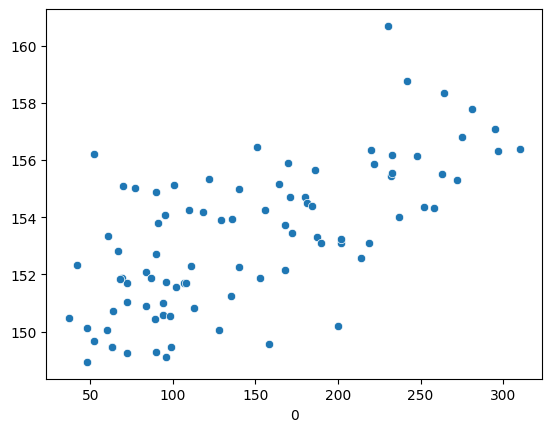

In [32]:
sns.scatterplot(x = y_test, y = predicciones);

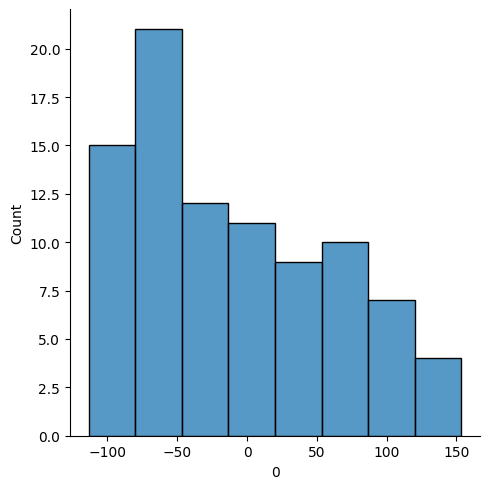

In [33]:
sns.displot((y_test - predicciones));

In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, predicciones))
print('MSE:', metrics.mean_squared_error(y_test, predicciones))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

MAE: 62.538197493213374
MSE: 5111.789530393479
RMSE: 71.49677986030895


In [36]:
intercept_scal = model_linreg.intercept_
features_std = pd.DataFrame(model_linreg.coef_, X_train.columns, columns=['coefficient'])

features_std.sort_values('coefficient', ascending=False)

,coefficient
bmi,26.234094
s5,23.535029
bp,16.680939
s4,11.509815
s6,2.560646
age,1.997921
s3,-3.820433
sex,-11.483826
s1,-15.114472


In [37]:
intercept_scal

np.float64(153.73654390934846)

#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

#### Print your `diabetes_target_test` and compare with the prediction. 

#### Is `diabetes_target_test` exactly the same as the model prediction? Use different error metrics

#### Iterate with a new model to assess if any improvements can be made compared to the previous one. Consider reducing the number of variables or using `StandardScaler` to enhance model performance.

In [18]:
from sklearn import preprocessing

